<a href="https://colab.research.google.com/github/mithun-22/Employee-attrition/blob/main/Employee_attrition_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read excel data
data = pd.read_excel("/content/Employee-Attrition.xlsx")

print("NULL VALUES :", data.isnull().sum()) # find null records
print("duplicate VALUES :",data.duplicated().sum()) # find duplicate records

# Get summary statistics
print("\nSummary Statistics:")
print(data.describe(include="all"))

# # Convert column names
# data.columns = data.columns.str.replace(r'([A-Z])', r'_\1', regex=True).str.lower().str.lstrip('_')

NULL VALUES : Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole        

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
datadepartment = data.groupby("Department")['JobSatisfaction'].count().sort_values(ascending=False)
datadepartment

,JobSatisfaction
Department,
Research & Development,961
Sales,446
Human Resources,63


Department and their JobSatisfaction level

In [6]:
datadepartment = data[['Department','JobSatisfaction']]

# Department with the lowest jobsatisfaction level

lowsatisfaction = datadepartment[datadepartment['JobSatisfaction']==1]
lowsatisfactioncount=lowsatisfaction.groupby('Department')['JobSatisfaction'].count().sort_values(ascending=False).reset_index()

mediumsatisfaction = datadepartment[datadepartment['JobSatisfaction']==2]
mediumsatisfactioncount=mediumsatisfaction.groupby('Department')['JobSatisfaction'].count().sort_values(ascending=False).reset_index()

highsatisfaction = datadepartment[datadepartment['JobSatisfaction']==3]
highsatisfactioncount=highsatisfaction.groupby('Department')['JobSatisfaction'].count().sort_values(ascending=False).reset_index()

veryhighsatisfaction = datadepartment[datadepartment['JobSatisfaction']==4]
veryhighsatisfactioncount = veryhighsatisfaction.groupby('Department')['JobSatisfaction'].count().sort_values(ascending=False).reset_index()

low = lowsatisfactioncount.rename(columns={'JobSatisfaction': '1 - Low'})
medium = mediumsatisfactioncount.rename(columns={'JobSatisfaction': '2 - Medium'})
high = highsatisfactioncount.rename(columns={'JobSatisfaction': '3 - High'})
very_high = veryhighsatisfactioncount.rename(columns={'JobSatisfaction': '4 - Very High'})

# Merge step-by-step
merged_df = pd.merge(low, medium, on='Department', how='inner')
merged_df = pd.merge(merged_df, high, on='Department', how='inner')
merged_df = pd.merge(merged_df, very_high, on='Department', how='inner')

merged_df


,Department,1 - Low,2 - Medium,3 - High,4 - Very High
0,Research & Development,192,174,300,295
1,Sales,86,86,127,147
2,Human Resources,11,20,15,17


In [7]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Bar(x=merged_df['Department'], y=merged_df['1 - Low'], name='1 - Low'))
fig.add_trace(go.Bar(x=merged_df['Department'], y=merged_df['2 - Medium'], name='2 - Medium'))
fig.add_trace(go.Bar(x=merged_df['Department'], y=merged_df['3 - High'], name='3 - High'))
fig.add_trace(go.Bar(x=merged_df['Department'], y=merged_df['4 - Very High'], name='4 - Very High'))

fig.update_layout(
    barmode='group',
    title='Job Satisfaction Level by Department (Plotly)',
    xaxis_title='Department',
    yaxis_title='Count of Job Satisfaction',
    legend_title='Satisfaction Level'
)
fig.show()

Model training and their attribution

1.Job Satisfaction prediction

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [9]:
feature_selection = data[["Education",'JobInvolvement',"JobLevel",'MonthlyIncome','YearsAtCompany',"YearsInCurrentRole","PercentSalaryHike","TotalWorkingYears"]]
feature_selection

,Education,JobInvolvement,JobLevel,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,PercentSalaryHike,TotalWorkingYears
0,2,3,2,5993,6,4,11,8
1,1,2,2,5130,10,7,23,10
2,2,2,1,2090,0,0,15,7
3,4,3,1,2909,8,7,11,8
4,1,3,1,3468,2,2,12,6
...,...,...,...,...,...,...,...,...
1465,2,4,2,2571,5,2,17,17
1466,1,2,3,9991,7,7,15,9
1467,3,4,2,6142,6,2,20,6
1468,3,2,2,5390,9,6,14,17


In [10]:
targetselection = data['PerformanceRating']
targetselection

,PerformanceRating
0,3
1,4
2,3
3,3
4,3
...,...
1465,3
1466,3
1467,4
1468,3


<ipython-input-11-2623291041>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='MonthlyIncome', ylabel='Density'>

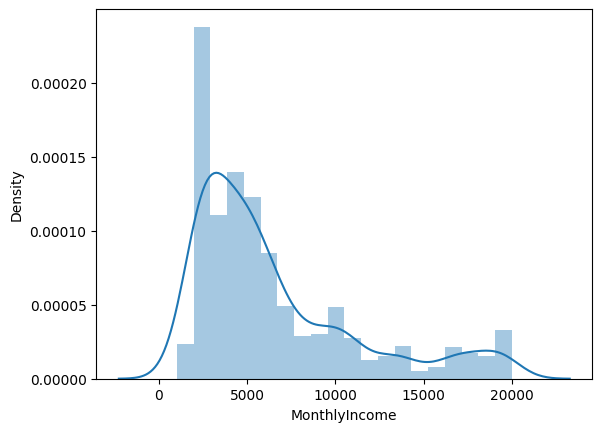

In [11]:
import seaborn as sns
import numpy as np
sns.distplot(data['MonthlyIncome'])

Employees with comparatively lower performance score had the highest attrition rates-hypothesis testing analysis

In [12]:
import scipy.stats as st

data1 = pd.crosstab(data['PerformanceRating'],data['Attrition'])

print(data1)

print(st.chi2_contingency(data1))

Attrition            No  Yes
PerformanceRating           
3                  1044  200
4                   189   37
Chi2ContingencyResult(statistic=np.float64(0.00015475439428271534), pvalue=np.float64(0.9900745465934576), dof=1, expected_freq=array([[1043.43673469,  200.56326531],
       [ 189.56326531,   36.43673469]]))


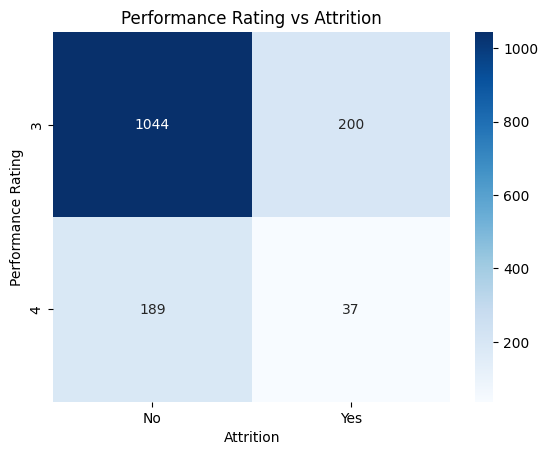

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pd.crosstab(data['PerformanceRating'], data['Attrition']), annot=True, fmt='d', cmap='Blues')
plt.title("Performance Rating vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Performance Rating")
plt.show()

In [14]:
import scipy.stats as st

data2 = pd.crosstab(data['OverTime'],data['Attrition'])

print(data2)

print(st.chi2_contingency(data2))

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127
Chi2ContingencyResult(statistic=np.float64(87.56429365828768), pvalue=np.float64(8.15842372153832e-21), dof=1, expected_freq=array([[884.06938776, 169.93061224],
       [348.93061224,  67.06938776]]))


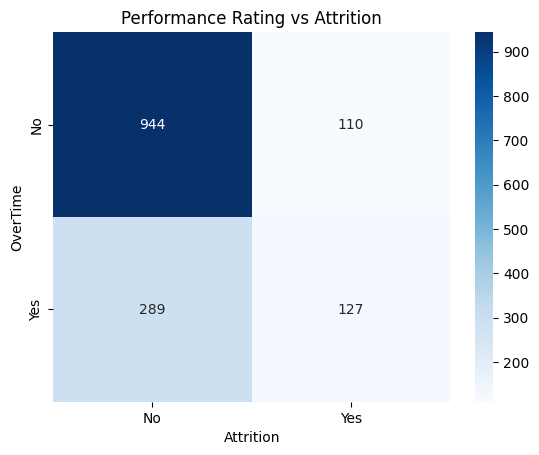

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(data2, annot=True, fmt='d', cmap='Blues')
plt.title("Performance Rating vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("OverTime")
plt.show()


In [16]:
data['income5k'] = data['MonthlyIncome']<5000

data3 = pd.crosstab(data['income5k'],data['Attrition'])

print(data3)

print(st.chi2_contingency(data3))

Attrition   No  Yes
income5k           
False      647   74
True       586  163
Chi2ContingencyResult(statistic=np.float64(35.07420551643058), pvalue=np.float64(3.173771640504164e-09), dof=1, expected_freq=array([[604.75714286, 116.24285714],
       [628.24285714, 120.75714286]]))


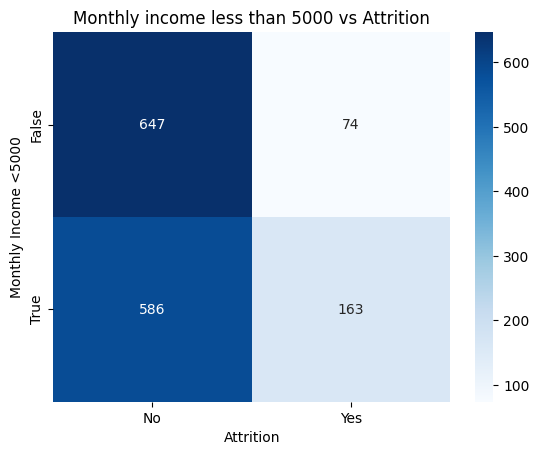

In [17]:
import seaborn as sns

sns.heatmap(data3, annot=True, fmt='d', cmap='Blues')
plt.title("Monthly income less than 5000 vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income <5000")
plt.show()

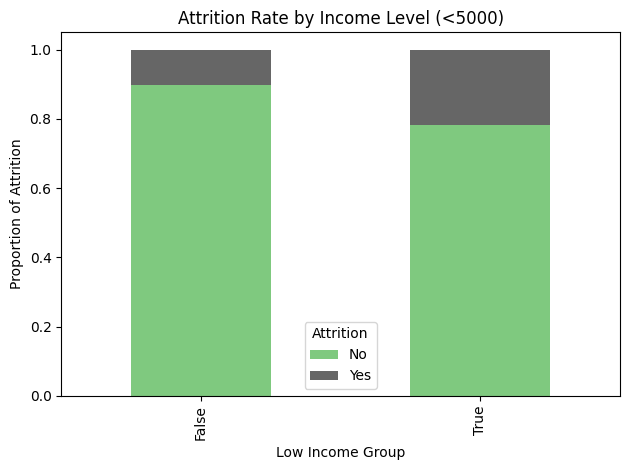

In [18]:
contingency_normalized = data3.div(data3.sum(axis=1), axis=0)

contingency_normalized.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Attrition Rate by Income Level (<5000)")
plt.xlabel("Low Income Group")
plt.ylabel("Proportion of Attrition")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Employees far from home (>15 miles) were significantly more likely to resign.

In [19]:
data['miles'] = data["DistanceFromHome"]>15

data4 = pd.crosstab(data['miles'],data['Attrition'])

print(data4)

print(st.chi2_contingency(data4))

Attrition   No  Yes
miles              
False      972  169
True       261   68
Chi2ContingencyResult(statistic=np.float64(6.0523492955792335), pvalue=np.float64(0.013887807102757159), dof=1, expected_freq=array([[957.04285714, 183.95714286],
       [275.95714286,  53.04285714]]))


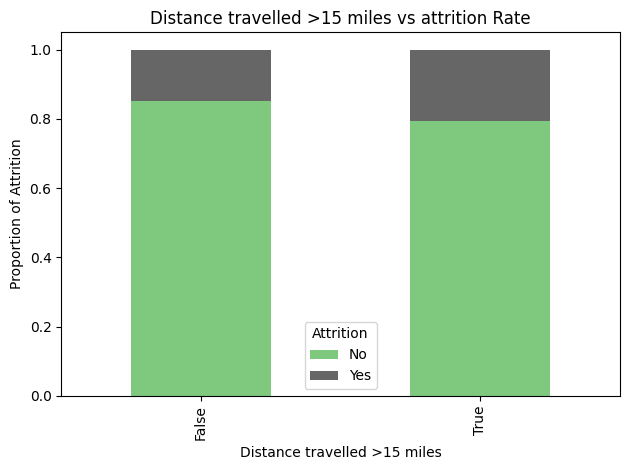

In [20]:
contingency_normalized = data4.div(data4.sum(axis=1), axis=0)

contingency_normalized.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Distance travelled >15 miles vs attrition Rate")
plt.xlabel("Distance travelled >15 miles")
plt.ylabel("Proportion of Attrition")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

In [21]:
data5 = pd.crosstab(data['JobSatisfaction'],data['Attrition'])

print(data5)

print(st.chi2_contingency(data4))

Attrition         No  Yes
JobSatisfaction          
1                223   66
2                234   46
3                369   73
4                407   52
Chi2ContingencyResult(statistic=np.float64(6.0523492955792335), pvalue=np.float64(0.013887807102757159), dof=1, expected_freq=array([[957.04285714, 183.95714286],
       [275.95714286,  53.04285714]]))


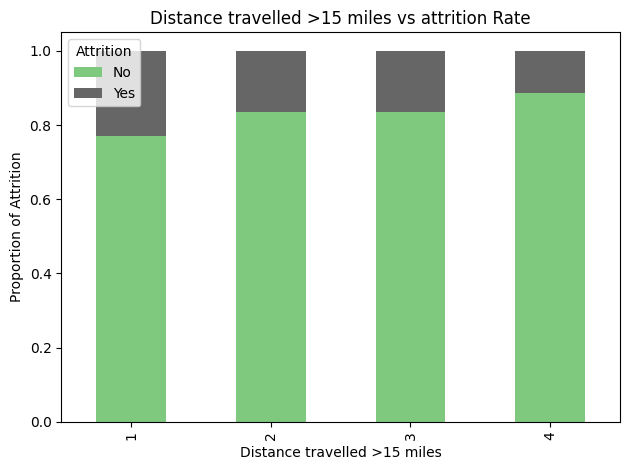

In [22]:
contingency_normalized = data5.div(data5.sum(axis=1), axis=0)

contingency_normalized.plot(kind='bar', stacked=True, colormap='Accent')
plt.title("Distance travelled >15 miles vs attrition Rate")
plt.xlabel("Distance travelled >15 miles")
plt.ylabel("Proportion of Attrition")
plt.legend(title="Attrition", labels=["No", "Yes"])
plt.tight_layout()
plt.show()

Predicting Employee Attrition (Turnover Prediction) Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

feature_selection = data[['JobSatisfaction','OverTime','Education','JobLevel','YearsAtCompany','YearsInCurrentRole','TotalWorkingYears']]
cols = ['JobSatisfaction','OverTime','Education','JobLevel','YearsAtCompany','YearsInCurrentRole','TotalWorkingYears']
targetselection = data['Attrition']

le = LabelEncoder()
data[cols] = data[cols].apply(le.fit_transform)

x = feature_selection
y = targetselection

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred=dt.predict(x_test)


print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7959183673469388
              precision    recall  f1-score   support

          No       0.89      0.87      0.88       255
         Yes       0.28      0.33      0.30        39

    accuracy                           0.80       294
   macro avg       0.59      0.60      0.59       294
weighted avg       0.81      0.80      0.80       294

[[221  34]
 [ 26  13]]


In [25]:
model = DecisionTreeClassifier()
param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
gridcv = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridcv.fit(x_train,y_train)

print("Best parameters from Grid Search CV:", gridcv.best_params_)
print("Best accuracy from Grid Search CV:", gridcv.best_score_)
decisiontree = gridcv.best_score_
# Train with best parameters
best_model_grid = gridcv.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))
print("accuracy_score",accuracy_score(y_pred,y_test))

Best parameters from Grid Search CV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best accuracy from Grid Search CV: 0.8392679408582762

Grid Search CV Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.93      0.90       255
         Yes       0.18      0.10      0.13        39

    accuracy                           0.82       294
   macro avg       0.53      0.52      0.52       294
weighted avg       0.78      0.82      0.80       294

accuracy_score 0.7959183673469388


Predicting Employee Attrition (Turnover Prediction) Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

dt = RandomForestClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
randomforest = accuracy_score(y_pred,y_test)
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8367346938775511
              precision    recall  f1-score   support

          No       0.94      0.88      0.91       273
         Yes       0.15      0.29      0.20        21

    accuracy                           0.84       294
   macro avg       0.55      0.58      0.55       294
weighted avg       0.88      0.84      0.86       294

[[240  33]
 [ 15   6]]


              Feature  Importance
6   TotalWorkingYears    0.243073
4      YearsAtCompany    0.181397
2           Education    0.132522
0     JobSatisfaction    0.125133
5  YearsInCurrentRole    0.123188
1            OverTime    0.107671
3            JobLevel    0.087017


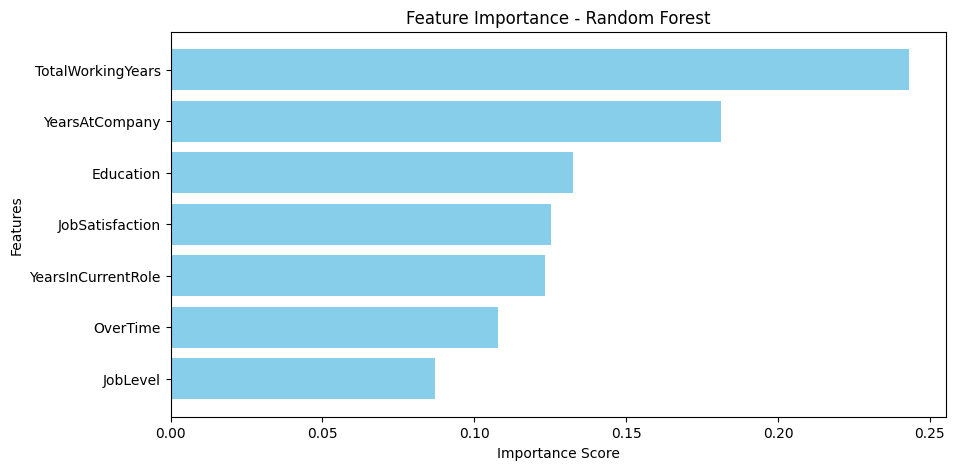

In [27]:
import matplotlib.pyplot as plt
feature_importance = dt.feature_importances_

feature_importance_df = pd.DataFrame({"Feature":x.columns,"Importance":feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance',ascending=False)
print(feature_importance_df)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance - Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

Gridsearch CV

In [28]:
model = RandomForestClassifier()
param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
gridcv = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridcv.fit(x_train,y_train)
y_pred = gridcv.predict(x_test)
print("Best parameters from GridSearchCV",gridcv.best_params_)
print("Best accuracy from GridSearchCV",gridcv.best_score_)
best_model_grid = gridcv.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
randomforest1 = gridcv.best_score_
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred))

Best parameters from GridSearchCV {'criterion': 'log_loss', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best accuracy from GridSearchCV 0.8494807068157229

Grid Search CV Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.97      0.92       255
         Yes       0.42      0.13      0.20        39

    accuracy                           0.86       294
   macro avg       0.65      0.55      0.56       294
weighted avg       0.82      0.86      0.83       294



In [29]:
df = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy Score': [decisiontree, randomforest1]
})
print(df)

           Model  Accuracy Score
0  Decision Tree        0.839268
1  Random Forest        0.849481


In [30]:
import pickle

# Save to file
with open('Attrition_rate.pkl', 'wb') as file:
    pickle.dump(gridcv, file)

print("Model saved as attrition rate.pkl ✅")

Model saved as attrition rate.pkl ✅


In [31]:
# Load from file
with open('Attrition_rate.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
prediction = loaded_model.predict([[1, 1, 2, 2, 2, 1,6]])[0]
print("Predicted Performance Rating:", prediction)

Predicted Performance Rating: No


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [32]:
def predict_attrition(JobSatisfaction, OverTime, Education, JobLevel, YearsAtCompany, YearsInCurrentRole, TotalWorkingYears):
    # Encode OverTime using the saved encoder

    # Create the input array for prediction
    input_data = [[
        JobSatisfaction,
        OverTime,
        Education,
        JobLevel,
        YearsAtCompany,
        YearsInCurrentRole,
        TotalWorkingYears
    ]]

    # Predict
    prediction = gridcv.predict(input_data)[0]

    # Interpret prediction
    return "Attrition: YES" if prediction == 1 else "Attrition: NO"

In [33]:
print(predict_attrition(
    JobSatisfaction=1,
    OverTime=1,
    Education=3,
    JobLevel=2,
    YearsAtCompany=5,
    YearsInCurrentRole=3,
    TotalWorkingYears=6
))

Attrition: NO


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



Predicting Performance Rating:



In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x = data[['Gender','OverTime','JobInvolvement','Education','Department','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

y = data['PerformanceRating']

le = LabelEncoder()

cols =['Gender','OverTime','JobInvolvement','Education','Department','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

data[cols] = data[cols].apply(le.fit_transform)

decisionmodel = DecisionTreeClassifier()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

decisionmodel.fit(x_train, y_train)

y_pred = decisionmodel.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
#gridsearch cv

decisionmodel = DecisionTreeClassifier()
param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
gridcv = GridSearchCV(decisionmodel,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridcv.fit(x_train,y_train)

print("Best parameters from Grid Search CV:", gridcv.best_params_)
print("Best accuracy from Grid Search CV:", gridcv.best_score_)
decisiontree = gridcv.best_score_
# Train with best parameters
best_model_grid = gridcv.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))
print("accuracy_score",accuracy_score(y_pred_grid,y_test))

decisiontreeaccuracyscore = accuracy_score(y_pred_grid,y_test)

0.7312925170068028
              precision    recall  f1-score   support

           3       0.85      0.83      0.84       251
           4       0.14      0.16      0.15        43

    accuracy                           0.73       294
   macro avg       0.50      0.50      0.50       294
weighted avg       0.75      0.73      0.74       294

Best parameters from Grid Search CV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy from Grid Search CV: 0.838434908041832

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           3       0.85      0.98      0.91       251
           4       0.14      0.02      0.04        43

    accuracy                           0.84       294
   macro avg       0.50      0.50      0.48       294
weighted avg       0.75      0.84      0.78       294

accuracy_score 0.8367346938775511


In [36]:
model = RandomForestClassifier()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
gridcv = GridSearchCV(model,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridcv.fit(x_train,y_train)

print("Best parameters from Grid Search CV:", gridcv.best_params_)
print("Best accuracy from Grid Search CV:", gridcv.best_score_)
decisiontree = gridcv.best_score_
# Train with best parameters
best_model_grid = gridcv.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))
print("accuracy_score",accuracy_score(y_pred_grid,y_test))

decisiontreeaccuracyscore = accuracy_score(y_pred_grid,y_test)

0.8299319727891157
              precision    recall  f1-score   support

           3       0.86      0.96      0.91       251
           4       0.18      0.05      0.07        43

    accuracy                           0.83       294
   macro avg       0.52      0.51      0.49       294
weighted avg       0.76      0.83      0.78       294

Best parameters from Grid Search CV: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy from Grid Search CV: 0.844388748647674

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.79       294

accuracy_score 0.8537414965986394


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [37]:
dt = model.feature_importances_

fetaureimp= pd.DataFrame({"features":x.columns,"Importance":dt}).sort_values(by='Importance',ascending=False)

fetaureimp

,features,Importance
5,YearsAtCompany,0.168130
3,Education,0.144268
6,YearsInCurrentRole,0.137234
8,YearsWithCurrManager,0.132485
7,YearsSinceLastPromotion,0.126058
2,JobInvolvement,0.109737
4,Department,0.064745
0,Gender,0.060573
1,OverTime,0.056771


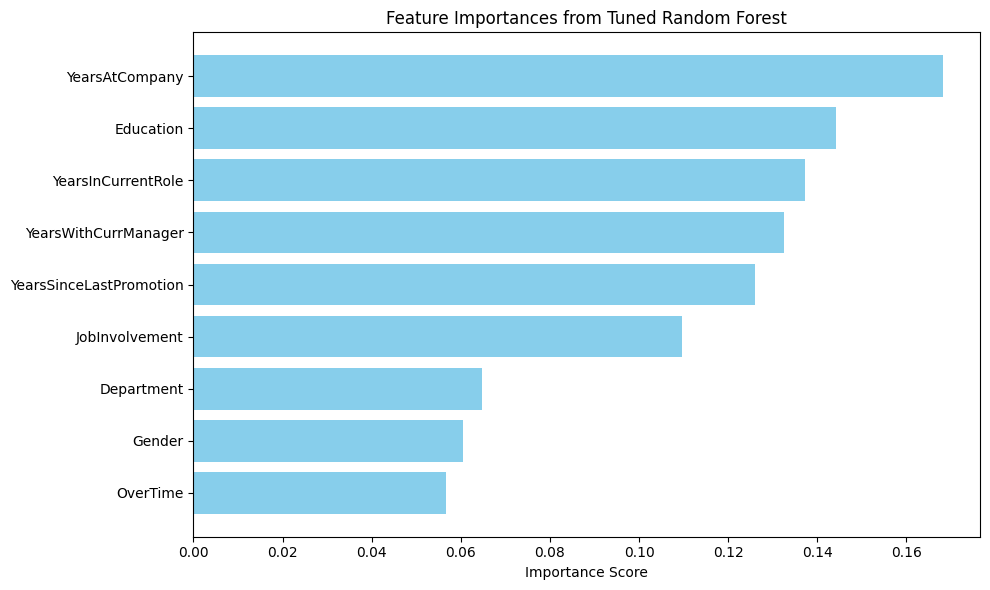

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(fetaureimp['features'], fetaureimp['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.title("Feature Importances from Tuned Random Forest")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

In [39]:
x = data[['YearsAtCompany','Education','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','JobInvolvement']]

y = data['PerformanceRating']

model = RandomForestClassifier()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8401360544217688
              precision    recall  f1-score   support

           3       0.86      0.97      0.91       251
           4       0.30      0.07      0.11        43

    accuracy                           0.84       294
   macro avg       0.58      0.52      0.51       294
weighted avg       0.78      0.84      0.80       294



In [40]:
def performance_rating(YearsAtCompany,Education,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion,JobInvolvement):
    input_var = [[YearsAtCompany,
                  Education,
                  YearsInCurrentRole,
                  YearsWithCurrManager,
                  YearsSinceLastPromotion,
                  JobInvolvement]]
    prediction=model.predict(input_var)[0]

    return prediction

In [41]:
print(performance_rating(6,2,6,3,3,4))
print(performance_rating(3,2,1,1,2,2))

3
3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [42]:
x = data[['YearsAtCompany','Education','YearsInCurrentRole','YearsWithCurrManager','YearsSinceLastPromotion','JobInvolvement']]

y = data['PerformanceRating']

decisionmodel = DecisionTreeClassifier()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

decisionmodel.fit(x_train,y_train)

y_pred = decisionmodel.predict(x_test)

print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

param_grid = {
   'criterion': ['gini', 'entropy','log_loss'],
   'max_depth': [5, 10, 15, None],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [1, 2, 4]
}
gridcv = GridSearchCV(decisionmodel,param_grid=param_grid,cv=5,scoring='accuracy',n_jobs=-1)
gridcv.fit(x_train,y_train)

print("Best parameters from Grid Search CV:", gridcv.best_params_)
print("Best accuracy from Grid Search CV:", gridcv.best_score_)
decisiontree = gridcv.best_score_
# Train with best parameters
best_model_grid = gridcv.best_estimator_
y_pred_grid = best_model_grid.predict(x_test)
# Performance Metrics
print("\nGrid Search CV Classification Report:\n", classification_report(y_test, y_pred_grid))
print("accuracy_score",accuracy_score(y_pred_grid,y_test))

randomforestaccuracy = accuracy_score(y_pred_grid,y_test)

0.7551020408163265
              precision    recall  f1-score   support

           3       0.85      0.86      0.86       251
           4       0.13      0.12      0.12        43

    accuracy                           0.76       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.75      0.76      0.75       294

Best parameters from Grid Search CV: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best accuracy from Grid Search CV: 0.8350306527226831

Grid Search CV Classification Report:
               precision    recall  f1-score   support

           3       0.85      1.00      0.92       251
           4       0.00      0.00      0.00        43

    accuracy                           0.85       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.73      0.85      0.78       294

accuracy_score 0.8503401360544217


In [43]:
#predicting Performance rating

def performance_rating(YearsAtCompany,Education,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion,JobInvolvement):
    input_var = [[YearsAtCompany,
                  Education,
                  YearsInCurrentRole,
                  YearsWithCurrManager,
                  YearsSinceLastPromotion,
                  JobInvolvement]]
    prediction=decisionmodel.predict(input_var)[0]

    return prediction

In [44]:
print(performance_rating(6,2,6,3,3,3))
print(performance_rating(2,2,1,1,2,2))

4
3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [45]:
import pickle

# Save to file
with open('performance_rating_model.pkl', 'wb') as file:
    pickle.dump(decisionmodel, file)

print("Model saved as performance_rating_model.pkl ✅")

Model saved as performance_rating_model.pkl ✅


In [46]:
# Load from file
with open('performance_rating_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

# Use it to predict
prediction = loaded_model.predict([[6, 2, 3, 3, 3, 3]])[0]
print("Predicted Performance Rating:", prediction)

Predicted Performance Rating: 4


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



Predicting Employee Promotion Likelihood:

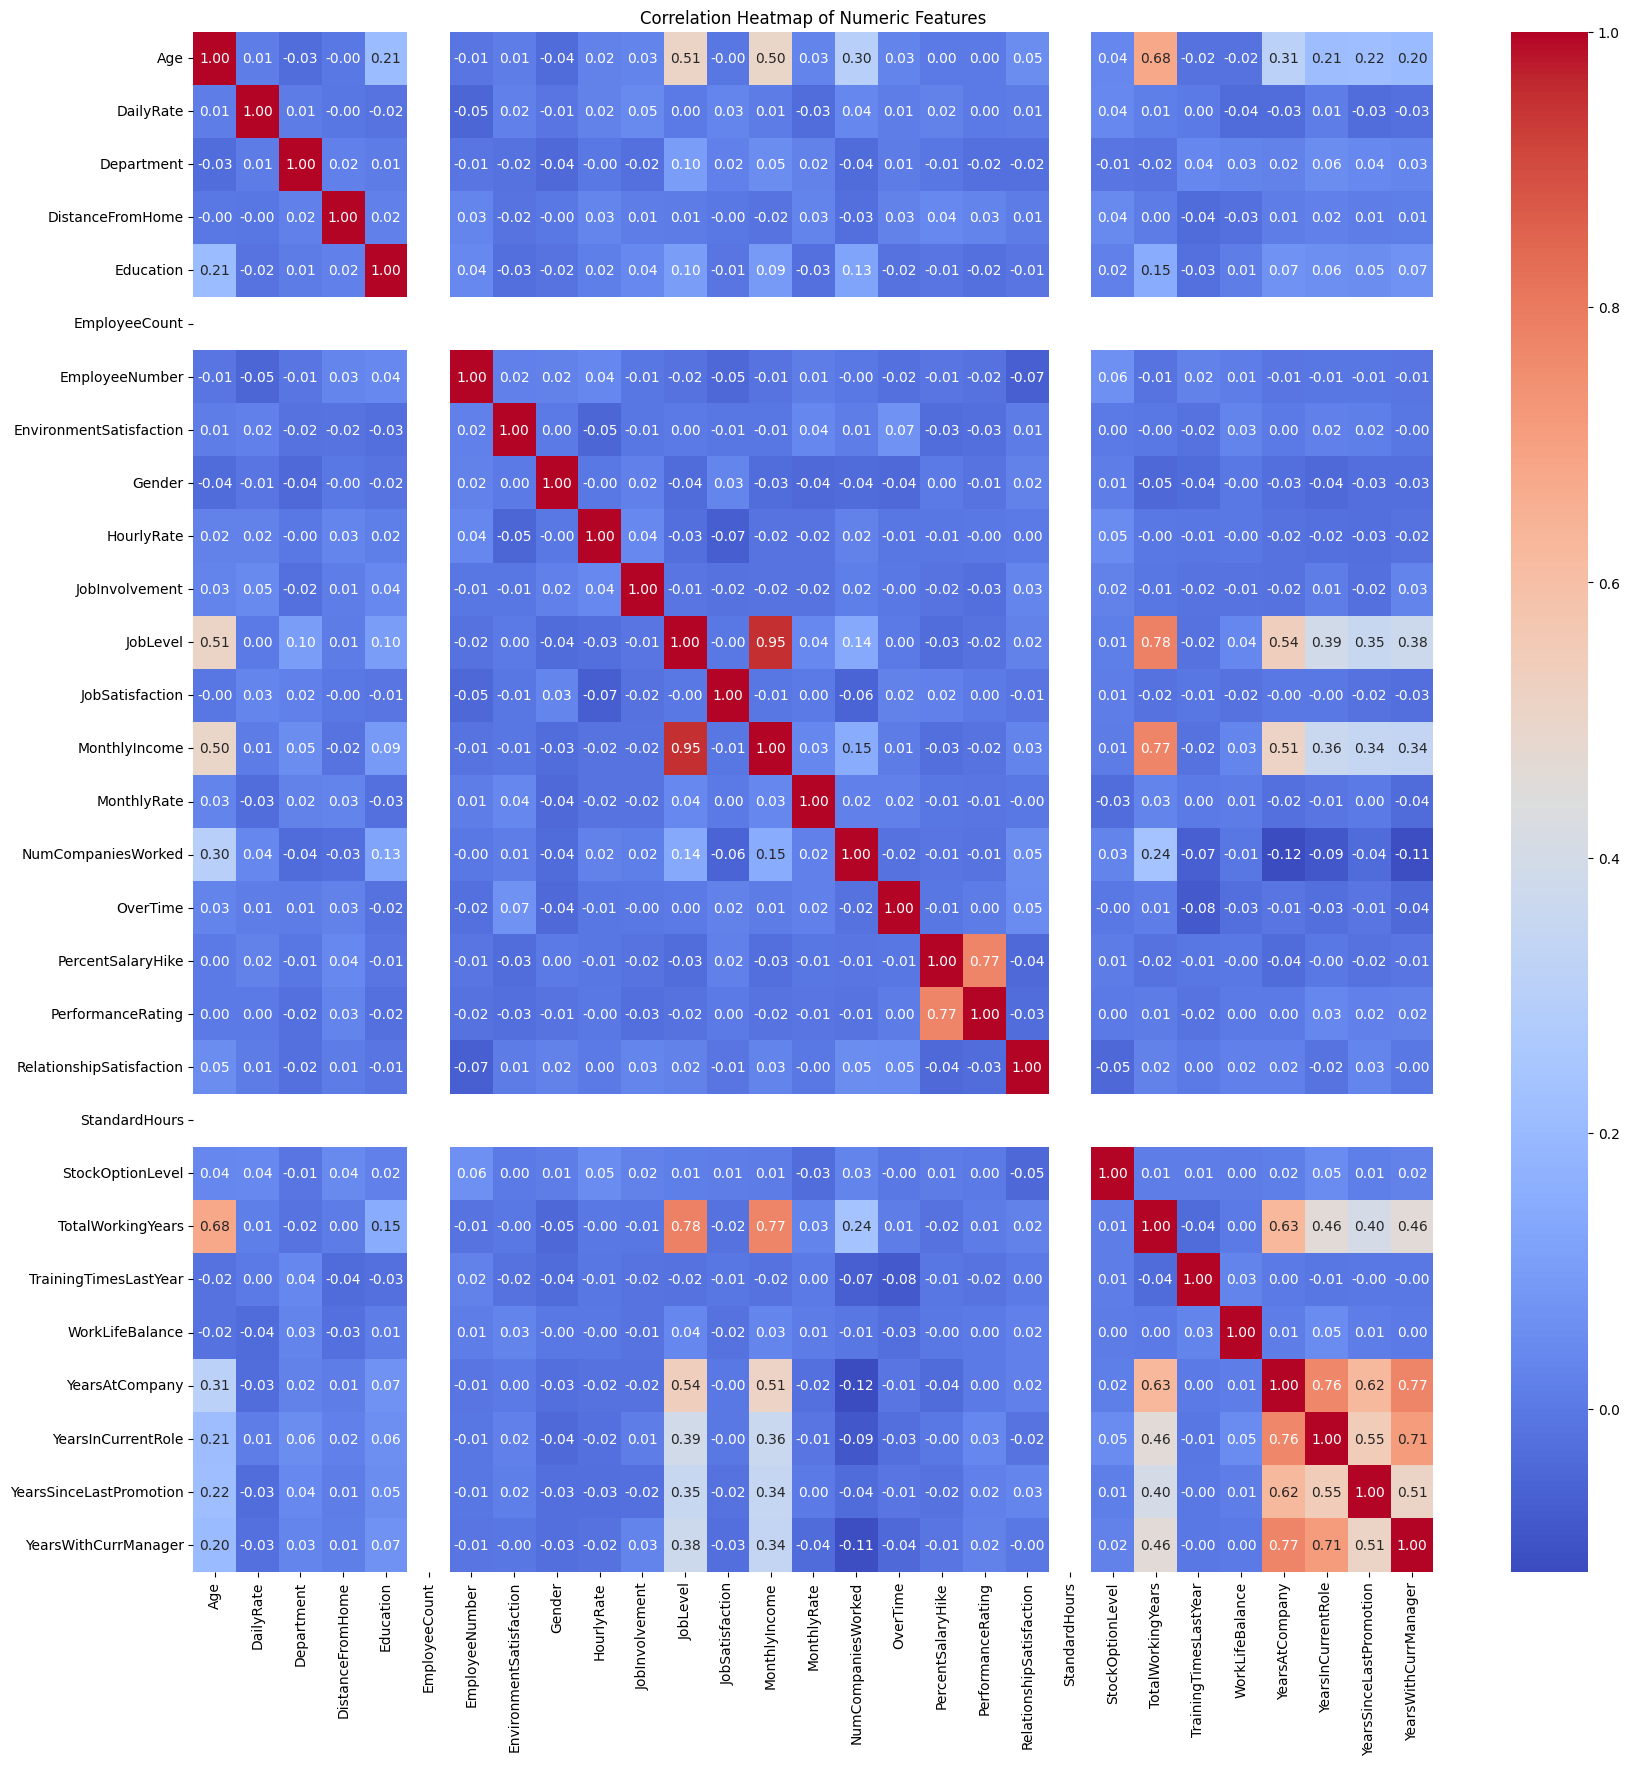

In [47]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 20))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [48]:
features = data[['JobLevel','TotalWorkingYears','YearsInCurrentRole','MonthlyIncome','YearsAtCompany','YearsWithCurrManager']]
target = data['YearsSinceLastPromotion']

x=features
y=target

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(x_train,y_train)
print(linearmodel.coef_)
print(linearmodel.intercept_)
print(linearmodel.score(x_test,y_test))

[-1.63240068e-01  3.74781849e-03  1.50685467e-01  6.13301038e-05
  2.30912454e-01 -2.42620680e-03]
-0.3788658878128577
0.4589137970170857


In [49]:
from sklearn.preprocessing import MinMaxScaler
import pickle
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

# Save the fitted scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [59]:
import pandas as pd

# Take numeric input from the user and convert to float or int
a = pd.DataFrame({
    'JobLevel': [int(input("Enter JobLevel: "))],
    'TotalWorkingYears': [int(input("Enter TotalWorkingYears: "))],
    'YearsInCurrentRole': [int(input("Enter YearsInCurrentRole: "))],
    'MonthlyIncome': [float(input("Enter MonthlyIncome: "))],
    'YearsAtCompany': [int(input("Enter YearsAtCompany: "))],
    'YearsWithCurrManager': [int(input("Enter YearsWithCurrManager: "))]
})

# Transform using pre-loaded scaler
df = scaler.transform(a)

# Predict using pre-trained model
prediction = model.predict(df)

print("Prediction:", prediction[0])



Enter JobLevel: 1
Enter TotalWorkingYears: 2
Enter YearsInCurrentRole: 20000
Enter MonthlyIncome: 2
Enter YearsAtCompany: 2
Enter YearsWithCurrManager: 12
Prediction: 0


In [54]:
import pickle

with open("EmployeePromotionLikelihood.pkl",'wb') as file:
          pickle.dump(linearmodel,file)
print("Model saved as performance_rating_model.pkl ✅")

Model saved as performance_rating_model.pkl ✅


In [57]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression  # or your trained model
import numpy as np

# Sample scaler and model (replace these with your trained ones)
scaler = StandardScaler()
model = LogisticRegression()

# Example training data for fitting the scaler and model (for demonstration only)
X_train = pd.DataFrame({
    'JobLevel': [1, 2, 3],
    'TotalWorkingYears': [5, 10, 15],
    'YearsInCurrentRole': [2, 4, 6],
    'MonthlyIncome': [3000, 6000, 9000],
    'YearsAtCompany': [3, 6, 9],
    'YearsWithCurrManager': [1, 3, 5]
})
y_train = [0, 1, 0]

# Fit scaler and model (you should load already trained ones instead)
scaler.fit(X_train)
model.fit(scaler.transform(X_train), y_train)

# Take inputs
a = pd.DataFrame({
    'JobLevel': [float(input("JobLevel: "))],
    'TotalWorkingYears': [float(input("TotalWorkingYears: "))],
    'YearsInCurrentRole': [float(input("YearsInCurrentRole: "))],
    'MonthlyIncome': [float(input("MonthlyIncome: "))],
    'YearsAtCompany': [float(input("YearsAtCompany: "))],
    'YearsWithCurrManager': [float(input("YearsWithCurrManager: "))]
})

# Transform input with the same scaler used during training
a_scaled = scaler.transform(a)

# Make prediction
prediction = model.predict(a_scaled)
print("Prediction:", prediction[0])


JobLevel: 1
TotalWorkingYears: 5
YearsInCurrentRole: 2
MonthlyIncome: 20000
YearsAtCompany: 3
YearsWithCurrManager: 3
Prediction: 0


In [60]:
yesattri = data[data['Attrition']=="Yes"]
yesattri[['Education','JobSatisfaction','OverTime','Education','JobLevel','YearsAtCompany','YearsInCurrentRole','TotalWorkingYears']]

,Education,JobSatisfaction,OverTime,Education,JobLevel,YearsAtCompany,YearsInCurrentRole,TotalWorkingYears
0,1,3,1,1,1,6,4,8
2,1,2,1,1,0,0,0,7
14,2,2,1,2,0,4,2,6
21,3,0,0,3,0,5,3,10
24,0,0,0,0,0,4,2,8
...,...,...,...,...,...,...,...,...
1438,2,0,0,2,0,1,0,1
1442,3,3,1,3,0,2,2,4
1444,1,2,0,1,0,10,9,14
1452,3,2,0,3,1,6,3,12
